<h1> <strong> A - Importation des modules

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.misc import derivative

<h1> <strong> B - Dérivée numérique

<h3> Permet l'évaluation des dérivées sur des données numériques c'est à dire sous forme discrète : Exemple d'une fonction Cosinus sous forme discrète

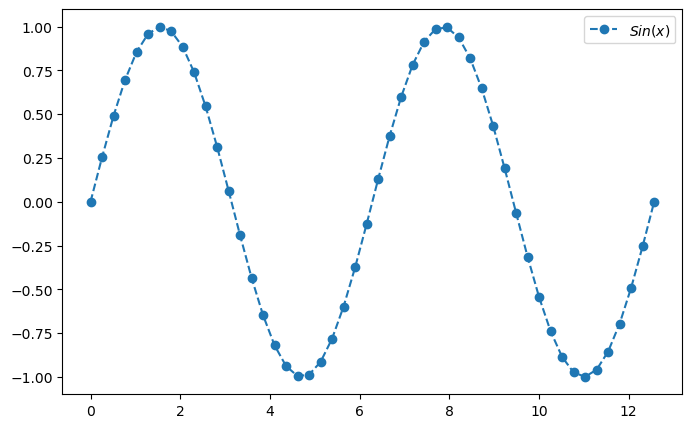

In [208]:
x0 = np.linspace( 0 ,  4*np.pi , 50)
y = np.sin(x0)

plt.figure(figsize=(8,5))

plt.plot(x0,y ,"o--" , label ="$Sin(x)$")

plt.legend()
plt.show()

<h3> Calcul de la dérivée des données dans la variables $y$ par rapport aux données dans la variable $x$

In [209]:
dy_over_dx = np.gradient( y , x0 )

<h3> Représentation graphique

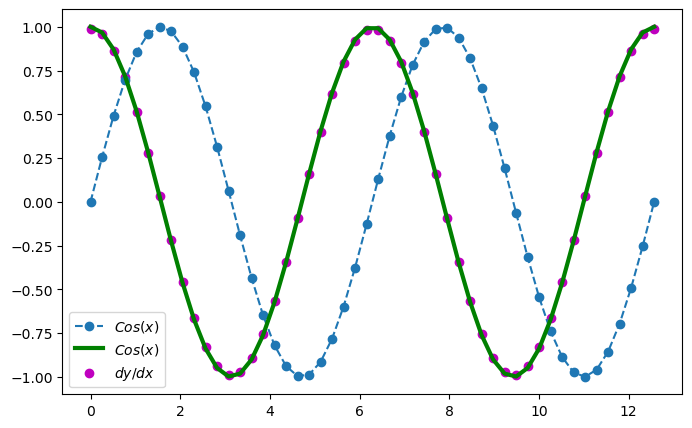

In [212]:
plt.figure(figsize=(8,5))

plt.plot( x0 , y , "o--" , label ="$Cos(x)$" )
plt.plot( x0 , np.cos(x0) , color= "g", lw = 3, label ="$Cos(x)$" )
plt.scatter( x0 , dy_over_dx  , color= "m" , label ="$dy/dx$" )

plt.legend()
plt.show()

<h1> <strong> Cas d'une fonction contenant du bruit

<h3> Imaginons que la fonction dont nous désirons évaluer la dérivée contiène du bruit

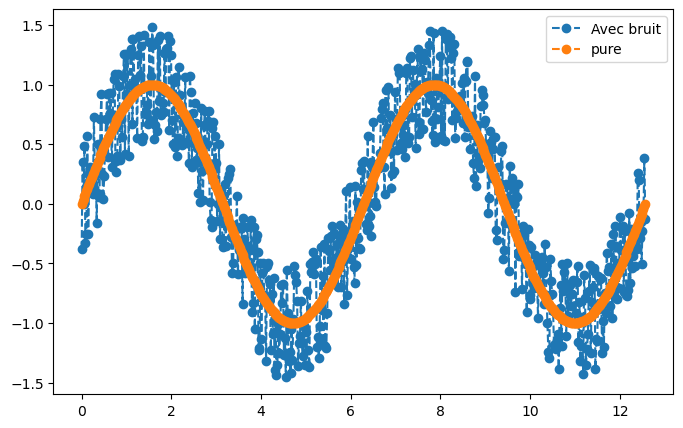

In [189]:
x = np.linspace( 0 ,  4*np.pi , 600)
y = np.sin(x)
dy_over_dx = np.gradient(y , x)
y_bruit = y + (np.random.rand(len(y)) -0.5)*1

plt.figure(figsize=(8,5))

plt.plot(x, y_bruit , "o--" , label = "Avec bruit")
plt.plot(x , y , "o--", label = "pure")

plt.legend()
plt.show()

<h3> Évaluons sa dérivée et comparons avec la dérivée du signal pure

In [190]:
deriv_y_bruit = np.gradient(y_bruit , x)

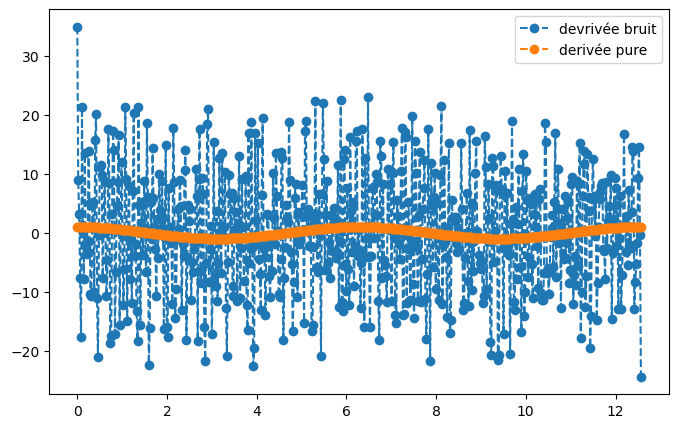

In [191]:
plt.figure(figsize = (8,5))

plt.plot(x , deriv_y_bruit , "o--" , label ="devrivée bruit")
plt.plot(x , dy_over_dx , "o--" , label = "derivée pure")

plt.legend()
plt.show()

<h3> <p> On peu observer que la dérivée du signal bruité contient encore plus de bruit par rapport à la fonction originale. Comme si le bruit avait été amplifié; ce qui est effectivement le cas car la forme de la dérivée d'une fonction dépends de la variation des valeurs des points voisins et plus il y a du bruit plus le bruit sera amplifié dans la dérivée car le bruit introduit un aléatoire dans le résultat des variations de valeurs. </p>
    <p> La façon la plus approptiée pour résoudre se problème est de lisser la courbe en utilisant une quelconque méthode afin de réduire les effets du bruit avant de passer à la dérivée

<h1> <strong> Lissage par convolution

<h3>  Filtre moyen qui permet d'attribuer en un point donné la moyenne des valeurs prises autour de ce point dans une fenêtre de n Points

In [192]:
def filtre ( n) :
    return np.ones(n)/n

590 600


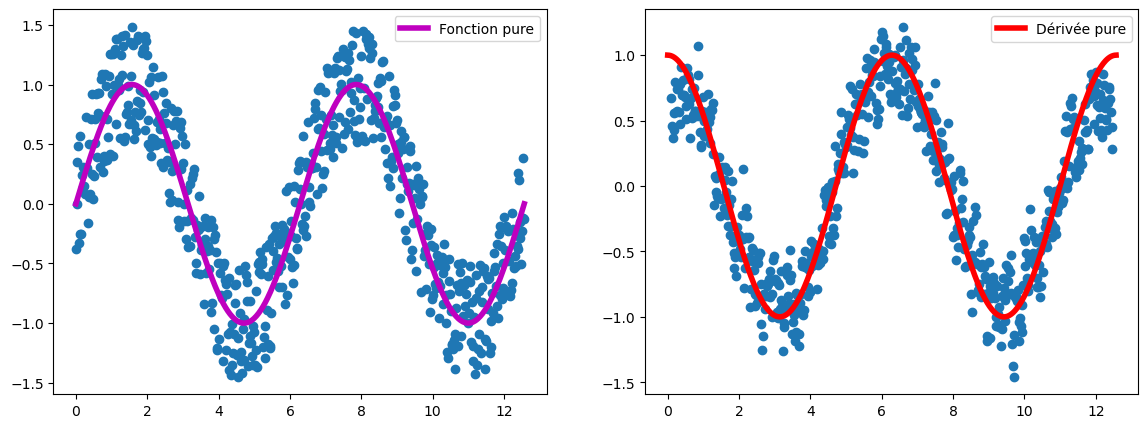

In [206]:
y_lisse = np.convolve( y_bruit , filtre(70) , mode = 'same')
delta = abs(y_bruit.size-y_lisse.size)

i = 5
y_lisse = y_lisse[i:-i]
x_lisse = x[i:-i]
print(y_lisse.size , y_bruit.size)
dy_lisse = np.gradient( y_lisse , x_lisse)

plt.figure( figsize = (14,5) )

plt.subplot(1,2,1)
plt.plot(x , y, lw =4 , color ="m", label = "Fonction pure")
plt.scatter(x , y_bruit , )
plt.legend()

plt.subplot(1,2,2)

plt.plot(x , dy_over_dx, lw = 4, color ="r", label = "Dérivée pure")
plt.scatter(x_lisse , dy_lisse,)

plt.legend()
plt.show()

<h1> <strong> C - Dérivée Symbolique

<h3> Permet l'évaluation des dérivées analytique des fonctions. Necessaire lorsqu'on possède la forme analytique de la fonction et/ou qu'on ne voudrait pas developper la dériver à la main

<h1> <strong> D - Dérivée Quasi-Symbolique